<a href="https://colab.research.google.com/github/YCYoon2015/DL_zero_to_all_PyTorch/blob/master/210915_Basic_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Classifier
### 동물 분류

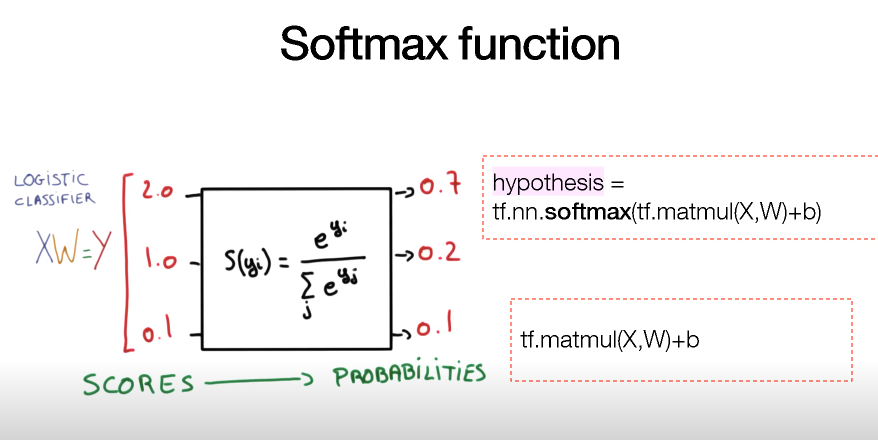

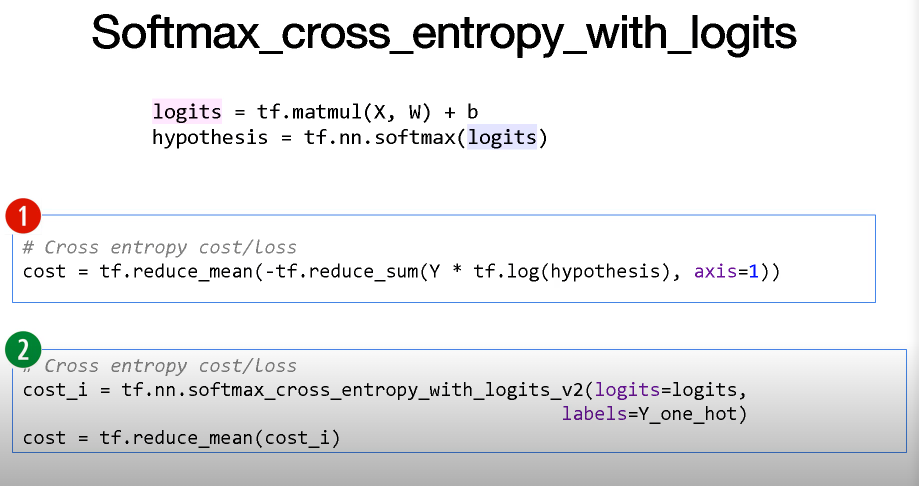

1번은 이전에 했던 접근방법이다. 

2 번은 텐서플로우에서 제공하는 함수를 이용한다. logit값을 input으로 받는다. 

logit은 log+odds 이다. odds는 우선 실패율 분의 성공 비율이다. 이 값에 log를 취한값이 logit이다. 이는 시그모이드 함수 형태이다.

In [10]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

tf.random.set_seed(777)  # for reproducibility

2.6.0


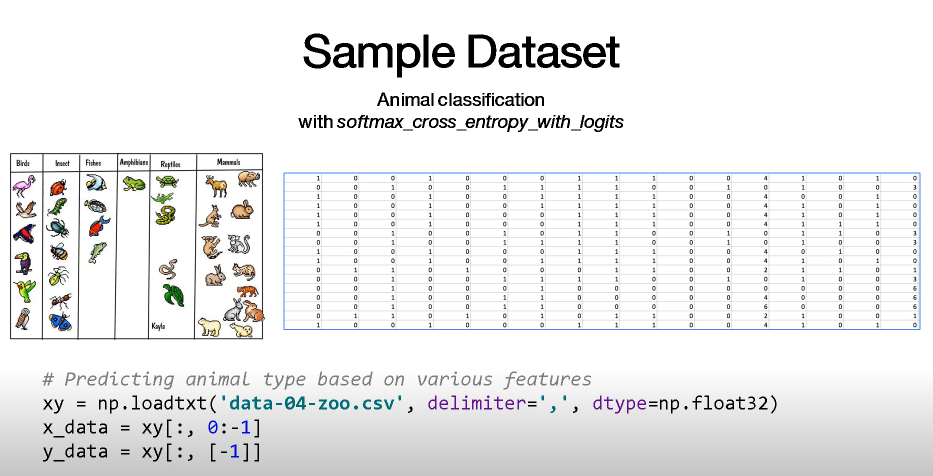

동물의 특징을 추출하여 어떤 데이터셋인가 추측함
0~6 까지 총 7종류로 분류된다. numpy를 활용해 csv를 로드한다.

In [22]:
xy = np.loadtxt('https://raw.githubusercontent.com/YCYoon2015/DL_zero_to_all_TensorFlow/master/data-04-zoo.csv', delimiter=',', dtype=np.int32) #tf1.13.1에서는 np.int32, 이전에는 np.float32
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [23]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    
    cost = tf.reduce_mean(cost_i)    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy